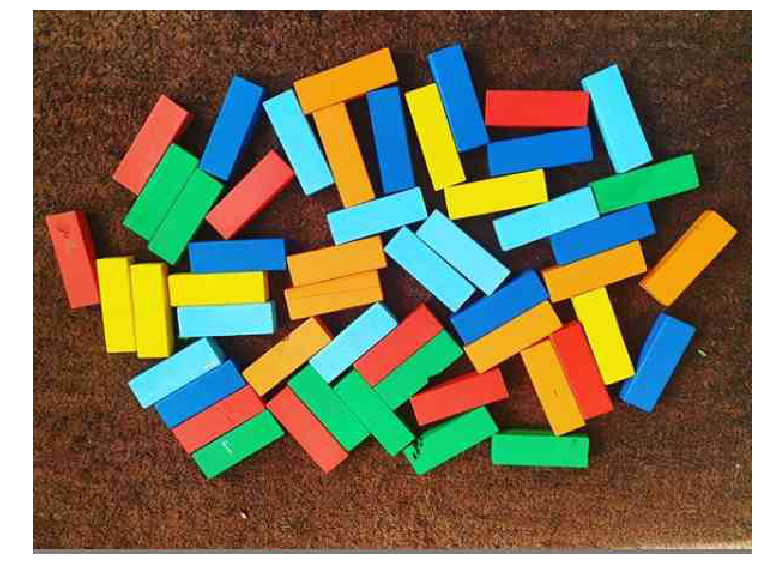

In [2]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
import cv2
from skimage.feature import corner_harris, corner_peaks

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

img = imread('Clipboard01.jpg')
imggray = rgb2gray(img)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [3]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

In [4]:
Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
Iyy = ndi.gaussian_filter(I_y**2, sigma=1)

In [12]:
k = 0.06

# determinant
detA = Ixx * Iyy - Ixy ** 2
# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

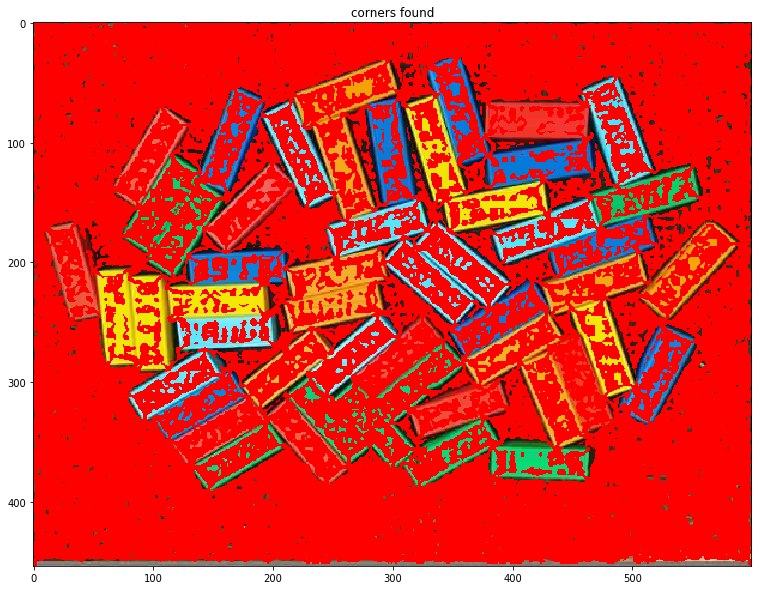

In [13]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]
    
fig, ax = plt.subplots()
ax.set_title("corners found")
ax.imshow(img_copy_for_corners)
plt.show()

### Non-max suppresion k = 0.06

(454, 600, 3)


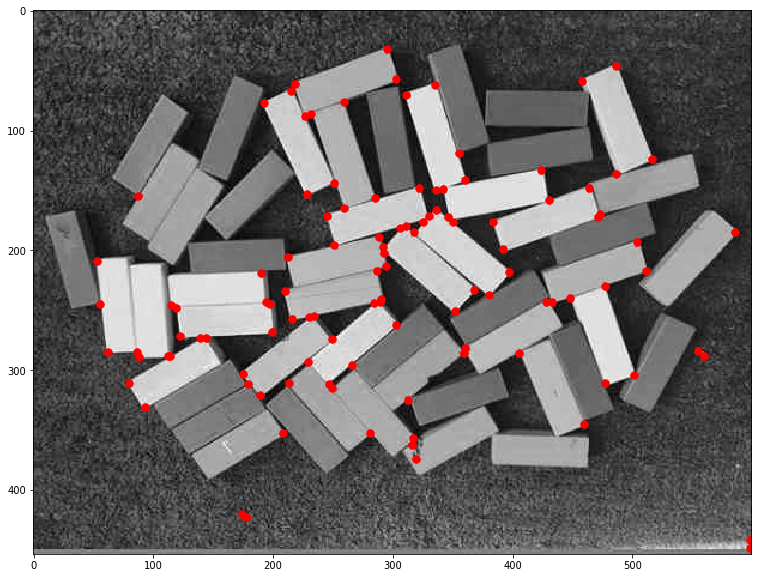

In [14]:
corners = corner_peaks(harris_response)
fig, ax = plt.subplots()
print(img.shape)
ax.imshow(imggray, interpolation='nearest', cmap='gray')
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=15)